In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from collections import Counter
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms, Normalize
import torchvision.models as models
from torch.utils.data import DataLoader, TensorDataset, Dataset, WeightedRandomSampler
from torch.optim import Adam, AdamW
from torch import nn
from torch import optim
from torchsummary import summary

from torchvision.transforms.functional import pad
import torchvision


from pathlib import Path

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import gc
gc.collect()
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device:",device)
print(f"Allocated: {torch.cuda.memory_allocated(device) / (1024 ** 2):.2f} MB")
print(f"Cached: {torch.cuda.memory_reserved(device) / (1024 ** 2):.2f} MB")

Using Device: cuda
Allocated: 0.00 MB
Cached: 0.00 MB


# Getting Started

In [6]:
x=torch.rand(3)
print(x)
type(x)

tensor([0.6375, 0.7364, 0.7428])


torch.Tensor

In [138]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [139]:
t1=torch.tensor([1,2,3,4,5])
print('1D tensor:',t1)

t2=torch.tensor([[1,2],[3,4],[5,6]])
print('\n2D Tensor:',t2)

t3=torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
print('\n3D Tensor:',t3)

1D tensor: tensor([1, 2, 3, 4, 5])

2D Tensor: tensor([[1, 2],
        [3, 4],
        [5, 6]])

3D Tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [140]:
t4=torch.rand(2,3)
print('random 2x3 tensor:\n',t4)

t5=torch.zeros(2,3)
print('\n2x3 tensor filled with zeros:\n',t5)

t6=torch.ones(2,3)
print('\n2x3 tensor filled with ones:\n',t6)

t7=torch.empty(2,3)
print('\n2x3 empty tensor:\n',t7)

random 2x3 tensor:
 tensor([[0.0929, 0.8024, 0.5947],
        [0.1535, 0.9415, 0.4627]])

2x3 tensor filled with zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

2x3 tensor filled with ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

2x3 empty tensor:
 tensor([[ 1.1364e-03, -4.8785e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [141]:
t8=torch.tensor([[1,2],[3,4],[5,6]])
print('2D tensor:\n',t8)

print('\nFirst row:',t8[0])

print('\nFirst column:',t8[:,0])

print('\nLast column:',t8[:,-1])

print('\nFirst 2 rows:\n',t8[:2])

2D tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])

First row: tensor([1, 2])

First column: tensor([1, 3, 5])

Last column: tensor([2, 4, 6])

First 2 rows:
 tensor([[1, 2],
        [3, 4]])


In [142]:
t9=torch.tensor([[1,2],[3,4],[5,6]])
t9_reshape=t9.view(2,3)
print('Original 2D tensor:\n',t9)

print('\nReshaped 2D tensor:\n',t9_reshape)

Original 2D tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])

Reshaped 2D tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])


In [143]:
t10=torch.tensor([[1,2,3],[4,5,6]])
t11=torch.tensor([[10,20,30]])
add=t10+t11
print('Original 2D tensor:\n',t10)

print('\nAdded tensor:\n',add)

matmul=torch.matmul(t10, t10.T)
print('\nMatmul tensor:\n',matmul)

Original 2D tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Added tensor:
 tensor([[11, 22, 33],
        [14, 25, 36]])

Matmul tensor:
 tensor([[14, 32],
        [32, 77]])


In [144]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

tensor_size = (100, 100)  
a = torch.randn(tensor_size, device=device)  
b = torch.randn(tensor_size, device=device)  

c = a + b  


print("Current GPU memory usage:")
print(f"Allocated: {torch.cuda.memory_allocated(device) / (1024 ** 2):.2f} MB")
print(f"Cached: {torch.cuda.memory_reserved(device) / (1024 ** 2):.2f} MB")

Using device: cuda
Current GPU memory usage:
Allocated: 0.12 MB
Cached: 2.00 MB


# Neural Networks

In [ ]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False, #extracts test data
    download=True,
    transform=ToTensor()
)

batch_size=60
train_dataloader=DataLoader(training_data, batch_size)
test_dataloader=DataLoader(test_data, batch_size)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

classes = list(labels_map.values())

## Fully Connected Linear

In [149]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1=nn.Linear(2,4)
        self.fc2=nn.Linear(4,1)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x
model=SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)


In [150]:
X_train=torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train=torch.tensor([[0.0],[1.0],[1.0],[0.0]])

model=SimpleNN()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.005)


for epoch in range(1000):
    model.train()
    outputs=model(X_train)
    loss=criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3065
Epoch [200/1000], Loss: 0.2618
Epoch [300/1000], Loss: 0.2404
Epoch [400/1000], Loss: 0.2232
Epoch [500/1000], Loss: 0.2077
Epoch [600/1000], Loss: 0.1932
Epoch [700/1000], Loss: 0.1803
Epoch [800/1000], Loss: 0.1678
Epoch [900/1000], Loss: 0.1556
Epoch [1000/1000], Loss: 0.1436


In [151]:
model.eval()
with torch.no_grad():
    test_data=torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
    predictions=model(test_data)
    print(predictions)

tensor([[0.3884],
        [0.6384],
        [0.5996],
        [0.3633]])


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork()
print(model)    

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [4]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.003)

def train(dataloader, model, loss_fn, optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        pred=model(X)
        loss=loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # if batch % 100 == 0:
    loss, current = loss.item(), (batch + 1) * len(X)
    print(f"loss: {loss}  [{current}/{size}]")
            
def test(dataloader, model, loss_fn):
    size=len(dataloader.dataset)    
    n_batches=len(dataloader)
    model.eval()
    test_loss, correct= 0,0
    with torch.no_grad():
        for X,y in dataloader:
            pred=model(X)
            test_loss+=loss_fn(pred, y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=n_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [5]:
epochs=10
for i in range(epochs):
    print(f"Epoch {i+1}:\n")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1:

loss: 1.5082645416259766  [60000/60000]
Test Error: 
 Accuracy: 60.0%, Avg loss: 1.473011 

Epoch 2:

loss: 1.0015138387680054  [60000/60000]
Test Error: 
 Accuracy: 66.0%, Avg loss: 0.959777 

Epoch 3:

loss: 0.846994161605835  [60000/60000]
Test Error: 
 Accuracy: 70.0%, Avg loss: 0.803486 

Epoch 4:

loss: 0.7590461373329163  [60000/60000]
Test Error: 
 Accuracy: 73.5%, Avg loss: 0.725632 

Epoch 5:

loss: 0.6968614459037781  [60000/60000]
Test Error: 
 Accuracy: 76.2%, Avg loss: 0.672210 

Epoch 6:

loss: 0.6495867371559143  [60000/60000]
Test Error: 
 Accuracy: 77.9%, Avg loss: 0.631773 

Epoch 7:

loss: 0.6136932373046875  [60000/60000]
Test Error: 
 Accuracy: 79.0%, Avg loss: 0.600784 

Epoch 8:

loss: 0.5865381360054016  [60000/60000]
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.576731 

Epoch 9:

loss: 0.5661325454711914  [60000/60000]
Test Error: 
 Accuracy: 80.6%, Avg loss: 0.557673 

Epoch 10:

loss: 0.5501990914344788  [60000/60000]
Test Error: 
 Accuracy: 81.1%, A

In [6]:
model.eval()
with torch.no_grad():
    for i in range(5):
        X, y = test_data[i][0], test_data[i][1]
        pred = model(X)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle Boot", Actual: "Ankle Boot"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Shirt", Actual: "Shirt"


In [13]:
for name, parameter in model.named_parameters():
    print(name, "--",parameter.size())

linear_relu_stack.0.weight -- torch.Size([512, 784])
linear_relu_stack.0.bias -- torch.Size([512])
linear_relu_stack.2.weight -- torch.Size([512, 512])
linear_relu_stack.2.bias -- torch.Size([512])
linear_relu_stack.4.weight -- torch.Size([10, 512])
linear_relu_stack.4.bias -- torch.Size([10])


In [ ]:
# Convolution 1D:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)
print(input.size())
print(output.size())
# print(output)
print(m)

torch.Size([20, 16, 50])
torch.Size([20, 33, 24])
Conv1d(16, 33, kernel_size=(3,), stride=(2,))


In [20]:
# Convolution 2D

m1 = nn.Conv2d(16, 33, 3, stride=2)

m2 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

m3 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output1 = m1(input)
output2 = m2(input)
output3 = m3(input)

print(input.size())
print(output1.size())
print(output2.size())
print(output3.size())
# print(output)


torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 24, 49])
torch.Size([20, 33, 28, 100])
torch.Size([20, 33, 26, 100])


In [23]:
# Convolution 3D

m1=nn.Conv3d(16, 33, 2, stride=2)
m2=nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input=torch.randn(20, 16, 10, 50, 50)
output1=m1(input)
output2=m2(input)
print(input.size())
print(output1.size())
print(output2.size())

torch.Size([20, 16, 10, 50, 50])
torch.Size([20, 33, 5, 25, 25])
torch.Size([20, 33, 8, 50, 49])


In [35]:
#dropout 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,10)
        )
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork()
print(model) 

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [36]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.AdamW(model.parameters(), lr=0.001)

def training(dataLoader, model, loss_fn, optimizer):
    size=len(dataLoader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataLoader):
        pred=model(X)
        loss=loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # if batch % 100 == 0:
    loss, current = loss.item(), (batch + 1) * len(X)
    print(f"loss: {loss}  [{current}/{size}]")
            
def testing(dataLoader, model, loss_fn):
    size=len(dataLoader.dataset)    
    n_batches=len(dataLoader)
    model.eval()
    test_loss, correct= 0,0
    with torch.no_grad():
        for X,y in dataLoader:
            pred=model(X)
            test_loss+=loss_fn(pred, y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=n_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
epochs=10
for i in range(epochs):
    print(f"Epoch {i+1}:\n")
    training(train_dataloader, model, loss_fn, optimizer)
    testing(test_dataloader, model, loss_fn)

Epoch 1:

loss: 0.43239572644233704  [60000/60000]
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.451494 

Epoch 2:

loss: 0.38935422897338867  [60000/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.399360 

Epoch 3:

loss: 0.3372545540332794  [60000/60000]
Test Error: 
 Accuracy: 86.1%, Avg loss: 0.378803 

Epoch 4:

loss: 0.3212348222732544  [60000/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.354543 

Epoch 5:

loss: 0.36041709780693054  [60000/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.342899 

Epoch 6:

loss: 0.2732643187046051  [60000/60000]
Test Error: 
 Accuracy: 87.1%, Avg loss: 0.352029 

Epoch 7:

loss: 0.27149611711502075  [60000/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.341071 

Epoch 8:

loss: 0.3338007628917694  [60000/60000]
Test Error: 
 Accuracy: 87.6%, Avg loss: 0.334360 

Epoch 9:

loss: 0.22312143445014954  [60000/60000]
Test Error: 
 Accuracy: 87.6%, Avg loss: 0.341208 

Epoch 10:

loss: 0.26701176166534424  [60000/60000]
Test Error: 
 Accuracy: 8

In [38]:
model.eval()
with torch.no_grad():
    for i in range(15,20):
        X, y = test_data[i][0], test_data[i][1]
        pred = model(X)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Trouser", Actual: "Trouser"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Bag", Actual: "Bag"
Predicted: "T-Shirt", Actual: "T-Shirt"


## CNN

In [57]:
#CNN

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1= nn.Conv2d(1, 64, 2)
        self.conv2= nn.Conv2d(64, 128, 2)
        self.relu= nn.ReLU()
        self.pool= nn.MaxPool2d(2)
        self.fc_shape=None
        self.flat= nn.Flatten()
        self.fc_shape= self.size_tracker(torch.randn(1, 1, 28, 28))
        self.fc= nn.Linear(self.fc_shape, 10)
        
    def size_tracker(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.flat(x)
        return x.shape[1]   
        
    def forward(self, x):
        x= self.pool(self.relu(self.conv1(x)))
        x= self.pool(self.relu(self.conv2(x)))
        x= self.flat(x)
        x= self.fc(x)
        return x

model=CNN()
print(model)
    

CNN(
  (conv1): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=4608, out_features=10, bias=True)
)


In [58]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.AdamW(model.parameters(), lr=0.0001)


def training(dataLoader, model, loss_fn, optimizer):
    size=len(dataLoader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataLoader):
        pred=model(X)
        loss=loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # if batch % 100 == 0:
    loss, current = loss.item(), (batch + 1) * len(X)
    print(f"loss: {loss}  [{current}/{size}]")

def testing(dataLoader, model, loss_fn):
    size=len(dataLoader.dataset)    
    n_batches=len(dataLoader)
    model.eval()
    test_loss, correct= 0,0
    with torch.no_grad():
        for X,y in dataLoader:
            pred=model(X)
            test_loss+=loss_fn(pred, y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=n_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [59]:
epoch=10
for i in range(epoch):
    print(f"Epoch {i+1}:\n")
    training(train_dataloader, model, loss_fn, optimizer)
    testing(test_dataloader, model, loss_fn)

Epoch 1:

loss: 0.5040072798728943  [60000/60000]
Test Error: 
 Accuracy: 81.2%, Avg loss: 0.525819 

Epoch 2:

loss: 0.41093847155570984  [60000/60000]
Test Error: 
 Accuracy: 84.3%, Avg loss: 0.449781 

Epoch 3:

loss: 0.3659093976020813  [60000/60000]
Test Error: 
 Accuracy: 85.6%, Avg loss: 0.415581 

Epoch 4:

loss: 0.33310309052467346  [60000/60000]
Test Error: 
 Accuracy: 86.2%, Avg loss: 0.393739 

Epoch 5:

loss: 0.3093981444835663  [60000/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.377560 

Epoch 6:

loss: 0.2918350398540497  [60000/60000]
Test Error: 
 Accuracy: 87.1%, Avg loss: 0.365336 

Epoch 7:

loss: 0.27667614817619324  [60000/60000]
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.355653 

Epoch 8:

loss: 0.26431235671043396  [60000/60000]
Test Error: 
 Accuracy: 87.7%, Avg loss: 0.347877 

Epoch 9:

loss: 0.2540619969367981  [60000/60000]
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.341319 

Epoch 10:

loss: 0.2446449249982834  [60000/60000]
Test Error: 
 Accuracy: 88.

In [65]:
model.eval()
with torch.no_grad():
    for i in range(20,25):
        X, y = test_data[i][0], test_data[i][1]
        X = X.unsqueeze(0)
        pred = model(X)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Pullover", Actual: "Pullover"
Predicted: "Sneaker", Actual: "Sandal"
Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Sandal", Actual: "Ankle Boot"
Predicted: "Trouser", Actual: "Trouser"


## Transfer Learning

In [9]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_dir= Path("D:\\AppStoneLab\\Pytorch\\data\\pizza_steak_sushi\\train")
test_dir= Path("D:\\AppStoneLab\\Pytorch\\data\\pizza_steak_sushi\\test")

weights= torchvision.models.ResNet50_Weights.DEFAULT

auto_transforms= weights.transforms() #automaticalaly fetches transformations used for resnet dataset
auto_transforms
weights

ResNet50_Weights.IMAGENET1K_V2

In [10]:
train_data = datasets.ImageFolder(train_dir, transform=auto_transforms)
test_data = datasets.ImageFolder(test_dir, transform=auto_transforms)

class_names = train_data.classes

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader( test_data, batch_size=32, shuffle=False)

# train_dataloader, test_dataloader, class_names
# for X,y in train_dataloader:
#     print(X.shape, y.shape)
#     break

In [11]:
model=models.resnet50(weights=weights).to(device)

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [12]:
for param in model.parameters():
    param.requires_grad=False
for param in model.fc.parameters():
    param.requires_grad=True

model.fc=nn.Linear(2048, 3)
model.to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [18]:
loss_fn= nn.CrossEntropyLoss()
optimizer=optim.AdamW(model.parameters(), lr=0.001)

def training(dataLoader, model, loss_fn, optimizer):
    size=len(dataLoader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataLoader):
        X, y = X.to(device), y.to(device)
        pred=model(X)
        loss=loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss, current = loss.item(), (batch + 1) * len(X)
    print(f"loss: {loss}  [{current}/{size}]")
    
def testing(dataLoader, model, loss_fn):
    size=len(dataLoader.dataset)    
    n_batches=len(dataLoader)
    model.eval()
    test_loss, correct= 0,0
    with torch.no_grad():
        for X,y in dataLoader:
            X, y = X.to(device), y.to(device)
            pred=model(X)
            test_loss+=loss_fn(pred, y).item()

            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=n_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [19]:
epoch=20
for i in range(epoch):
    print(f"Epoch {i+1}:\n")
    training(train_dataloader, model, loss_fn, optimizer)
    testing(test_dataloader, model, loss_fn)

Epoch 1:

loss: 1.0324268341064453  [8/225]
Test Error: 
 Accuracy: 89.3%, Avg loss: 0.787780 

Epoch 2:

loss: 1.15571928024292  [8/225]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.703075 

Epoch 3:

loss: 1.2716748714447021  [8/225]
Test Error: 
 Accuracy: 89.3%, Avg loss: 0.722085 

Epoch 4:

loss: 0.9466521739959717  [8/225]
Test Error: 
 Accuracy: 90.7%, Avg loss: 0.675305 

Epoch 5:

loss: 0.8595020771026611  [8/225]
Test Error: 
 Accuracy: 92.0%, Avg loss: 0.647986 

Epoch 6:

loss: 0.9800182580947876  [8/225]
Test Error: 
 Accuracy: 92.0%, Avg loss: 0.623761 

Epoch 7:

loss: 1.0992772579193115  [8/225]
Test Error: 
 Accuracy: 90.7%, Avg loss: 0.603905 

Epoch 8:

loss: 0.7749406695365906  [8/225]
Test Error: 
 Accuracy: 92.0%, Avg loss: 0.510256 

Epoch 9:

loss: 1.13480806350708  [8/225]
Test Error: 
 Accuracy: 93.3%, Avg loss: 0.560505 

Epoch 10:

loss: 0.9455206394195557  [8/225]
Test Error: 
 Accuracy: 94.7%, Avg loss: 0.509020 

Epoch 11:

loss: 1.2691264152526855  [8/225

In [24]:
model.eval()
with torch.no_grad():
    for i in range(len(test_data)):
        X, y = test_data[i][0], test_data[i][1]
        X = X.unsqueeze(0)
        X = X.to(device)
        pred = model(X)
        predicted, actual = class_names[pred[0].argmax(0)], class_names[y]
        if predicted != actual:
            print(f'at {i}, Predicted: "{predicted}", Actual: "{actual}"')

at 12, Predicted: "steak", Actual: "pizza"
at 29, Predicted: "sushi", Actual: "steak"
at 51, Predicted: "pizza", Actual: "sushi"
at 55, Predicted: "pizza", Actual: "sushi"
at 63, Predicted: "pizza", Actual: "sushi"
at 70, Predicted: "steak", Actual: "sushi"


Partition -------------------- EfficientNet_B0-----------------------------------------

In [ ]:
weights= torchvision.models.EfficientNet_B0_Weights.DEFAULT 

auto_transforms= weights.transforms() #Automaticalaly fetches transformations used for EfficientNet dataset
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [28]:
train_data = datasets.ImageFolder(train_dir, transform=auto_transforms)
test_data = datasets.ImageFolder(test_dir, transform=auto_transforms)

class_names = train_data.classes

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader( test_data, batch_size=32, shuffle=False)

In [40]:
model= models.efficientnet_b0(weights=weights).to(device)

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [41]:
for param in model.parameters():
    param.requires_grad=False
for param in model.classifier.parameters():
    param.requires_grad=True

model.classifier=nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=3, bias=True)
)
model.to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [44]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.AdamW(model.parameters(), lr=0.001)

def training(dataLoader, model, loss_fn, optimizer):
    size=len(dataLoader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataLoader):
        X, y= X.to(device), y.to(device)
        pred=model(X)
        loss=loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss, current = loss.item(), (batch+1)*len(X)
    print(f"Loss: {loss}  [{current}/{size}]")
    
def testing(dataLoader, model, loss_fn):
    size=len(dataLoader.dataset)    
    n_batches=len(dataLoader)
    model.eval()
    test_loss, correct= 0,0
    with torch.no_grad():
        for X,y in dataLoader:
            X, y = X.to(device), y.to(device)
            pred=model(X)
            test_loss+=loss_fn(pred, y).item()

            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss/=n_batches
    correct/=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [45]:
epoch=25
for i in range(epoch):
    print(f"Epoch {i+1}:")
    training(train_dataloader, model, loss_fn, optimizer)
    testing(test_dataloader, model, loss_fn)

Epoch 1:
Loss: 1.3211660385131836  [8/225]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.707175 

Epoch 2:
Loss: 1.4573718309402466  [8/225]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.596720 

Epoch 3:
Loss: 1.1044596433639526  [8/225]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.601943 

Epoch 4:
Loss: 1.3412692546844482  [8/225]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.535182 

Epoch 5:
Loss: 1.086911678314209  [8/225]
Test Error: 
 Accuracy: 93.3%, Avg loss: 0.548714 

Epoch 6:
Loss: 0.974144458770752  [8/225]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.490777 

Epoch 7:
Loss: 1.6584638357162476  [8/225]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.461498 

Epoch 8:
Loss: 1.0076453685760498  [8/225]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.459437 

Epoch 9:
Loss: 1.379204511642456  [8/225]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.533686 

Epoch 10:
Loss: 0.9481418132781982  [8/225]
Test Error: 
 Accuracy: 89.3%, Avg loss: 0.471392 

Epoch 11:
Loss: 0.6770046353340149  [8/225]
Test Err

In [46]:
model.eval()
with torch.no_grad():
    for i in range(len(test_data)):
        X, y = test_data[i][0], test_data[i][1]
        X = X.unsqueeze(0)
        X = X.to(device)
        pred = model(X)
        predicted, actual = class_names[pred[0].argmax(0)], class_names[y]
        if predicted != actual:
            print(f'at {i}, Predicted: "{predicted}", Actual: "{actual}"')

at 12, Predicted: "sushi", Actual: "pizza"
at 13, Predicted: "steak", Actual: "pizza"
at 16, Predicted: "sushi", Actual: "pizza"
at 29, Predicted: "pizza", Actual: "steak"
at 43, Predicted: "sushi", Actual: "steak"
at 45, Predicted: "pizza", Actual: "sushi"
at 46, Predicted: "pizza", Actual: "sushi"
at 64, Predicted: "steak", Actual: "sushi"
at 70, Predicted: "steak", Actual: "sushi"


## RNN

In [294]:
#RNN 

df = pd.read_csv(r"D:\\AppStoneLab\\TensorFlow\Datasets\\Clothing-Review.csv")

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [295]:
def filter_score(rating):
    return int(rating > 3)

df["Label"] = df["Rating"].apply(filter_score)

df["Label"].value_counts(normalize=True)

Label
1    0.770369
0    0.229631
Name: proportion, dtype: float64

In [296]:
lemm = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def toLower(data):
    if isinstance(data, float):
        return "<UNK>"
    return str(data).lower()

def remove_punctuation_func(text):
    return re.sub(r"[^a-zA-Z0-9\s]", " ", text)

def remove_stopwords(text):
    words = []
    for w in text.split():
        if w not in stop_words:
            words.append(w)
    return " ".join(words)

def lemmatize_sentence(text):
    return " ".join([lemm.lemmatize(w) for w in text.split()])

X = df[["Class Name", "Title", "Review Text", "Label"]].copy()

X["Title"] = X["Title"].apply(toLower).apply(remove_punctuation_func).apply(remove_stopwords).apply(lemmatize_sentence)
X["Review Text"] = X["Review Text"].apply(toLower).apply(remove_punctuation_func).apply(remove_stopwords).apply(lemmatize_sentence)

X["Text"] = X["Title"] + " " + X["Review Text"] + " " + X["Class Name"].astype(str)

X.head()

,Class Name,Title,Review Text,Label,Text
0,Dresses,major design flaw,high hope dress really wanted work initially o...,0,major design flaw high hope dress really wante...
1,Pants,favorite buy,love love love jumpsuit fun flirty fabulous ev...,1,favorite buy love love love jumpsuit fun flirt...
2,Blouses,flattering shirt,shirt flattering due adjustable front tie perf...,1,flattering shirt shirt flattering due adjustab...
3,Dresses,petite,love tracy reese dress one petite 5 foot tall ...,0,petite love tracy reese dress one petite 5 foo...
4,Knits,cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,1,cagrcoal shimmer fun aded basket hte last mint...


In [300]:
from collections import Counter

MAX_VOCAB = 10000   # like TensorFlow tokenizer(num_words=10000)


counter = Counter()

for text in X["Text"]:
    counter.update(text.split())

vocab = ["<PAD>", "<UNK>"]

most_common_words = counter.most_common(MAX_VOCAB - len(vocab))
vocab += [word for word, _ in most_common_words]

vocab_size = len(vocab)

word2index = {word: idx for idx, word in enumerate(vocab)}
index2word = {idx: word for word, idx in word2index.items()}

pad_id = word2index["<PAD>"]
unk_id = word2index["<UNK>"]

print("Vocab size:", vocab_size)
print("PAD id:", pad_id)
print("UNK id:", unk_id)

Vocab size: 10000
PAD id: 0
UNK id: 1


In [ ]:
def pad_features(reviews, pad_id, seq_length=40):
    features = np.full((len(reviews), seq_length), pad_id, dtype=np.int64)

    for i, row in enumerate(reviews):
        row = row[:seq_length]
        features[i, :len(row)] = np.array(row, dtype=np.int64)

    return features

seq_length = 40   

encoding = []
for text in X["Text"]:
    enc = [word2index.get(word, unk_id) for word in text.split()]
    encoding.append(enc)

X["Encoding"] = encoding

# Create padded matrix (numpy array)
X_padded = pad_features(X["Encoding"], pad_id, seq_length)

print("X_padded shape:", X_padded.shape)
print("X_padded dtype:", X_padded.dtype)

X["Padded Encoding"] = list(X_padded)

X_padded shape: (19662, 40)
X_padded dtype: int64


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.25, random_state=100, stratify=y)

trainset = TensorDataset(torch.tensor(X_train, dtype=torch.long),torch.tensor(y_train, dtype=torch.float32))

testset = TensorDataset(torch.tensor(X_test, dtype=torch.long),torch.tensor(y_test, dtype=torch.float32))

train_dataloader = DataLoader(trainset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=False)

len(train_dataloader), len(test_dataloader)

(231, 77)

In [311]:
class RNN(nn.Module):
    def __init__(self, vocab_size, pad_id, embed_dim=128, hidden_dim=64, dropout=0.2):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_id)

        self.rnn1 = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.rnn2 = nn.RNN(hidden_dim, hidden_dim, batch_first=True)

        self.fc1 = nn.Linear(hidden_dim, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.embedding(x)         

        out1, _ = self.rnn1(x)         
        out2, h2 = self.rnn2(out1)     

        last_hidden = h2[-1]          

        x = self.fc1(last_hidden)
        x = self.relu(x)
        x = self.dropout(x)

        logits = self.fc2(x).squeeze(1)
        return logits
    
model = RNN(vocab_size=vocab_size, pad_id=pad_id).to(device)
print(model)

RNN(
  (embedding): Embedding(10000, 128, padding_idx=0)
  (rnn1): RNN(128, 64, batch_first=True)
  (rnn2): RNN(64, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [312]:
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
pos_weight = torch.tensor([neg / pos], dtype=torch.float32).to(device)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
# loss_fn=nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def f1_score_binary(y_true, y_pred):
    # y_true, y_pred are tensors of 0/1 floats
    tp = ((y_true == 1) & (y_pred == 1)).sum().item()
    fp = ((y_true == 0) & (y_pred == 1)).sum().item()
    fn = ((y_true == 1) & (y_pred == 0)).sum().item()

    precision = tp / (tp + fp + 1e-8)
    recall    = tp / (tp + fn + 1e-8)

    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    return f1, precision, recall

def training(dataLoader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X, y in dataLoader:
        X, y = X.to(device), y.to(device)

        pred = model(X)  # logits
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X.size(0)

        probs = torch.sigmoid(pred)
        preds = (probs >= 0.5).float()
        correct += (preds == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    acc = correct / total
    return avg_loss, acc

def testing(dataLoader, model, loss_fn):
    model.eval()

    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_true = []
    with torch.no_grad():
        for X, y in dataLoader:
            X, y = X.to(device), y.to(device)

            logits = model(X)
            loss = loss_fn(logits, y)

            total_loss += loss.item() * X.size(0)

            probs = torch.sigmoid(logits)
            preds = (probs >= 0.5).float()

            correct += (preds == y).sum().item()
            total += y.size(0)

            all_preds.append(preds)
            all_true.append(y)

        avg_loss = total_loss / total
        acc = correct / total

        all_preds = torch.cat(all_preds)
        all_true = torch.cat(all_true)

        f1, precision, recall = f1_score_binary(all_true, all_preds)

        # print(f"Test -> loss: {avg_loss:.4f} | acc: {acc*100:.2f}% | "f"F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

    return avg_loss, acc, f1

In [313]:
epochs = 10

for epoch in range(epochs):
    train_loss, train_acc = training(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc, test_f1 = testing(test_dataloader, model, loss_fn)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train -> loss: {train_loss:.4f} | acc: {train_acc*100:.2f}%")
    print(f"Test  -> loss: {test_loss:.4f} | acc: {test_acc*100:.2f}% | F1: {test_f1:.4f}")
    print("-"*50)

Epoch 1/10
Train -> loss: 0.3168 | acc: 55.15%
Test  -> loss: 0.2977 | acc: 64.44% | F1: 0.7282
--------------------------------------------------
Epoch 2/10
Train -> loss: 0.2845 | acc: 70.66%
Test  -> loss: 0.3271 | acc: 45.30% | F1: 0.4969
--------------------------------------------------
Epoch 3/10
Train -> loss: 0.2737 | acc: 70.93%
Test  -> loss: 0.2713 | acc: 78.97% | F1: 0.8614
--------------------------------------------------
Epoch 4/10
Train -> loss: 0.2432 | acc: 78.62%
Test  -> loss: 0.2521 | acc: 79.96% | F1: 0.8667
--------------------------------------------------
Epoch 5/10
Train -> loss: 0.2561 | acc: 73.43%
Test  -> loss: 0.2700 | acc: 73.41% | F1: 0.8129
--------------------------------------------------
Epoch 6/10
Train -> loss: 0.2530 | acc: 78.73%
Test  -> loss: 0.2631 | acc: 76.69% | F1: 0.8418
--------------------------------------------------
Epoch 7/10
Train -> loss: 0.2492 | acc: 77.97%
Test  -> loss: 0.2774 | acc: 74.00% | F1: 0.8194
----------------------

## LSTM

In [282]:
torch.manual_seed(100)
np.random.seed(100)
torch.cuda.manual_seed_all(100)

In [283]:
df = pd.read_csv(r"D:\AppStoneLab\Pytorch\data\spam.csv", encoding="iso8859_14")
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

X = df["v2"].astype(str)
y = df["v1"].map({"ham": 0, "spam": 1}).astype(int)

print(df.shape)
print(y.value_counts())
df.head()

(5572, 2)
v1
0    4825
1     747
Name: count, dtype: int64


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [284]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

X = X.apply(clean_text)
X.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: v2, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train:", len(X_train), "Test:", len(X_test))
print("Train label dist:", np.bincount(y_train))
print("Test  label dist:", np.bincount(y_test))


Train: 4457 Test: 1115
Train label dist: [3859  598]
Test  label dist: [966 149]


In [286]:
def tokenize(text):
    return text.split()

PAD_TOKEN = "<PAD>"
UNK_TOKEN = "<UNK>"

counter = Counter()
for text in X_train:
    counter.update(tokenize(text))

max_vocab_size = 20000
most_common = counter.most_common(max_vocab_size)

word2idx = {PAD_TOKEN: 0, UNK_TOKEN: 1}
for i, (word, _) in enumerate(most_common, start=2):
    word2idx[word] = i

vocab_size = len(word2idx)
print("Vocab size:", vocab_size)

Vocab size: 7696


In [ ]:
def encode(text):
    return [word2idx.get(tok, word2idx[UNK_TOKEN]) for tok in tokenize(text)]

train_lengths = [len(tokenize(t)) for t in X_train]
max_len = int(np.percentile(train_lengths, 95))
max_len = max(10, min(max_len, 100))
print("max_len:", max_len)

def pad_sequence(seq, max_len):
    seq = seq[:max_len]
    return seq + [word2idx[PAD_TOKEN]] * (max_len - len(seq))

max_len: 33


In [288]:
class SpamDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        seq = encode(self.texts[idx])
        seq = pad_sequence(seq, max_len)
        x = torch.tensor(seq, dtype=torch.long)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return x, y

train_dataset = SpamDataset(X_train, y_train)
test_dataset  = SpamDataset(X_test, y_test)

print("Train dataset:", len(train_dataset))
print("Test dataset :", len(test_dataset))

Train dataset: 4457
Test dataset : 1115


In [289]:
y_train_np = np.array(y_train)

class_counts = np.bincount(y_train_np)         # [ham, spam]
class_weights = 1.0 / class_counts
sample_weights = class_weights[y_train_np]

sampler = WeightedRandomSampler(
    weights=torch.tensor(sample_weights, dtype=torch.float),
    num_samples=len(sample_weights),
    replacement=True
)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Train batches:", len(train_loader))
print("Test batches :", len(test_loader))

Train batches: 140
Test batches : 35


In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=128, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=word2idx[PAD_TOKEN])

        self.lstm = nn.LSTM(
            input_size=embed_dim,
            hidden_size=hidden_dim,
            batch_first=True,
            bidirectional=False
        )

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, 2)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)

        h_f = hidden[-2]
        h_b = hidden[-1]
        h = torch.cat((h_f, h_b), dim=1)

        h = self.dropout(h)
        logits = self.fc(h)
        return logits

model = LSTMClassifier(vocab_size=vocab_size).to(device)
print(model)

BiLSTMClassifier(
  (embedding): Embedding(7696, 128, padding_idx=0)
  (lstm): LSTM(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)


In [291]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

print("LR:", optimizer.param_groups[0]["lr"])

LR: 0.0003


In [292]:
def train_one_epoch(loader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for X, y in loader:
        X, y = X.to(device), y.to(device)

        logits = model(X)
        loss = loss_fn(logits, y)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        total_loss += loss.item()

        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return total_loss / len(loader), correct / total


def evaluate(loader, model, loss_fn):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    all_preds = []
    all_true = []

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)

            logits = model(X)
            loss = loss_fn(logits, y)
            total_loss += loss.item()

            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_true.extend(y.cpu().numpy())

    return total_loss / len(loader), correct / total, np.array(all_true), np.array(all_preds)

In [293]:
epochs = 10

for epoch in range(1, epochs + 1):
    train_loss, train_acc = train_one_epoch(train_loader, model, loss_fn, optimizer)
    test_loss, test_acc, y_true, y_pred = evaluate(test_loader, model, loss_fn)

    print(f"Epoch {epoch:02d} | Train Loss {train_loss:.4f} Acc {train_acc:.4f} | Test Loss {test_loss:.4f} Acc {test_acc:.4f}")

Epoch 01 | Train Loss 0.4286 Acc 0.8342 | Test Loss 0.1463 Acc 0.9543
Epoch 02 | Train Loss 0.0989 Acc 0.9688 | Test Loss 0.1171 Acc 0.9659
Epoch 03 | Train Loss 0.0475 Acc 0.9834 | Test Loss 0.1024 Acc 0.9686
Epoch 04 | Train Loss 0.0318 Acc 0.9888 | Test Loss 0.0946 Acc 0.9695
Epoch 05 | Train Loss 0.0172 Acc 0.9953 | Test Loss 0.1178 Acc 0.9704
Epoch 06 | Train Loss 0.0073 Acc 0.9987 | Test Loss 0.1342 Acc 0.9695
Epoch 07 | Train Loss 0.0072 Acc 0.9984 | Test Loss 0.1614 Acc 0.9677
Epoch 08 | Train Loss 0.0052 Acc 0.9993 | Test Loss 0.1423 Acc 0.9686
Epoch 09 | Train Loss 0.0018 Acc 0.9998 | Test Loss 0.1446 Acc 0.9722
Epoch 10 | Train Loss 0.0019 Acc 0.9998 | Test Loss 0.1697 Acc 0.9677


In [296]:
print("True distribution:", np.bincount(y_true))
print("Pred distribution:", np.bincount(y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["ham", "spam"]))

True distribution: [966 149]
Pred distribution: [988 127]

Confusion Matrix:
 [[959   7]
 [ 29 120]]

Classification Report:

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.94      0.81      0.87       149

    accuracy                           0.97      1115
   macro avg       0.96      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Bi-LSTM and Bi-GRU

In [38]:
# Bidirectional LSTM

df=pd.read_csv(r"D:\AppStoneLab\TensorFlow\Datasets\TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.drop('Adj Close', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-01,5.000,5.184,4.054,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,38557000


In [39]:
scaler=MinMaxScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df.head()

,Open,High,Low,Close,Volume
0,0.001439,0.001498,0.000871,0.001004,0.133184
1,0.001114,0.001043,0.000614,0.000554,0.082560
2,0.000627,0.000543,0.000140,0.000051,0.110956
3,0.000042,0.000000,0.000000,0.000000,0.111857
4,0.000000,0.000144,0.000097,0.000271,0.124842


In [40]:
time_frame=60 #days
X=[]
y=[]
cols=['Open', 'High', 'Low', 'Volume']
features=df[cols]
label=df['Close']
for i in range(len(df)-time_frame):
    X.append(features[i:i+time_frame].values)
    y.append(label[i+time_frame])
X=np.array(X)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

trainset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),torch.tensor(y_train, dtype=torch.float32))
testset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),torch.tensor(y_test, dtype=torch.float32))

train_dataloader = DataLoader(trainset, batch_size=32, shuffle=False, drop_last=False)
test_dataloader = DataLoader(testset, batch_size=32, shuffle=False, drop_last=False)

len(train_dataloader), len(test_dataloader)

(69, 23)

In [41]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        
    def forward(self, x):
        # h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        # c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        out, (h_n, c_n) = self.lstm(x)
        h_forward = h_n[-2]
        h_backward = h_n[-1]
        h = torch.cat((h_forward, h_backward), dim=1)
        out = self.fc(h)
        # out = self.fc(out[:, -1, :])
        return out

model1=BiLSTM(input_size=4, hidden_size=64, output_size=1)
model1.to(device)
print(model1)

class BiGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

model2=BiGRU(input_size=4, hidden_size=64, output_size=1)
model2.to(device)

BiLSTM(
  (lstm): LSTM(4, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


BiGRU(
  (gru): GRU(4, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [42]:
loss=nn.MSELoss()
optimizer = AdamW(model1.parameters(), lr=3e-4, weight_decay=0.0)
torch.nn.utils.clip_grad_norm_(model1.parameters(), max_norm=1.0)

def training(dataLoader, model, loss_fn, optimizer):
    size = len(dataLoader.dataset)
    model.train()
    
    train_loss = 0
    all_preds = []
    all_targets = []

    for batch, (X, y) in enumerate(dataLoader):
        X, y = X.to(device), y.to(device)
        y = y.view(-1, 1)
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        train_loss += loss.item() * X.size(0)  

        
        all_preds.append(pred.detach().cpu())
        all_targets.append(y.detach().cpu())

    train_loss /= size

    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    r2 = r2_score(all_targets.numpy(), all_preds.numpy())
    
    print(f"Train Metrics:\nLoss: {train_loss:.6f}, R2: {r2:.6f}")

def testing(dataLoader, model, loss_fn):
    size = len(dataLoader.dataset)
    model.eval()
    total=0
    test_loss = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X, y in dataLoader:
            X, y = X.to(device), y.to(device)
            y = y.view(-1, 1)
            pred = model(X)
            loss = loss_fn(pred, y)
            
            test_loss += loss.item() * X.size(0)
            total += X.size(0)
            all_preds.append(pred.cpu())
            all_targets.append(y.cpu())

    test_loss /= total

    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    r2 = r2_score(all_targets.numpy(), all_preds.numpy())
    
    print(f"Test Metrics:\nAvg Loss: {test_loss:.6f}, R2: {r2:.6f}")

In [43]:
epoch=50
for i in range(epoch):
    print("-"*40)
    print(f"Epoch {i+1}:")
    print("-"*40)
    training(train_dataloader, model1, loss, optimizer)
    testing(test_dataloader, model1, loss)

----------------------------------------
Epoch 1:
----------------------------------------
Train Metrics:
Loss: 0.000635, R2: -0.876759
Test Metrics:
Avg Loss: 0.188401, R2: -1.349072
----------------------------------------
Epoch 2:
----------------------------------------
Train Metrics:
Loss: 0.000367, R2: -0.085858
Test Metrics:
Avg Loss: 0.178684, R2: -1.227908
----------------------------------------
Epoch 3:
----------------------------------------
Train Metrics:
Loss: 0.000333, R2: 0.015098
Test Metrics:
Avg Loss: 0.168851, R2: -1.105310
----------------------------------------
Epoch 4:
----------------------------------------
Train Metrics:
Loss: 0.000267, R2: 0.210556
Test Metrics:
Avg Loss: 0.159971, R2: -0.994585
----------------------------------------
Epoch 5:
----------------------------------------
Train Metrics:
Loss: 0.000221, R2: 0.347064
Test Metrics:
Avg Loss: 0.152112, R2: -0.896593
----------------------------------------
Epoch 6:
---------------------------------

## GRU

In [51]:
# GRU

df=pd.read_csv(r"D:\AppStoneLab\Pytorch\data\train.csv")
df.drop('date', axis=1, inplace=True)
df.head()

,title,text,subject
0,Greens say no support for Macron's EZ budget i...,BERLIN (Reuters) - None of the German parties ...,worldnews
1,Trump faces uphill battle to overcome court's ...,(Reuters) - U.S. President Donald Trump faces ...,politicsNews
2,Ukraine president denies hampering anti-corrup...,VILNIUS/KIEV (Reuters) - Ukrainian President P...,worldnews
3,U.S. defense chief: White House shakeup will n...,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,politicsNews
4,Irish government set to fall weeks before Brex...,DUBLIN (Reuters) - Ireland s minority governme...,worldnews


In [52]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)
df.head()

,title,text,subject
0,greens say no support for macron s ez budget i...,berlin reuters none of the german parties invo...,worldnews
1,trump faces uphill battle to overcome court s ...,reuters u s president donald trump faces an up...,politicsNews
2,ukraine president denies hampering anti corrup...,vilnius kiev reuters ukrainian president petro...,worldnews
3,u s defense chief white house shakeup will not...,brussels reuters u s defense secretary jim mat...,politicsNews
4,irish government set to fall weeks before brex...,dublin reuters ireland s minority government l...,worldnews


In [53]:
df['input']= df['title'] + ' : ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)
df.head()

,subject,input
0,worldnews,greens say no support for macron s ez budget i...
1,politicsNews,trump faces uphill battle to overcome court s ...
2,worldnews,ukraine president denies hampering anti corrup...
3,politicsNews,u s defense chief white house shakeup will not...
4,worldnews,irish government set to fall weeks before brex...


In [54]:
df['length']= df['input'].apply(len)
df['length'].describe()

count    14991.000000
mean      2387.155693
std       1644.869203
min        196.000000
25%        954.500000
50%       2231.000000
75%       3218.000000
max      29183.000000
Name: length, dtype: float64

In [55]:
X=df['input']
y=df['subject'].map({'worldnews':0, 'politicsNews':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11243,), (3748,), (11243,), (3748,))

In [56]:
def tokenize(text):
    return text.split()

PAD_TOKEN = "<PAD>"
UNK_TOKEN = "<UNK>"

counter = Counter()
for text in X_train:
    counter.update(tokenize(text))

max_vocab_size = 20000
most_common = counter.most_common(max_vocab_size)

word2idx = {PAD_TOKEN: 0, UNK_TOKEN: 1}
for i, (word, _) in enumerate(most_common, start=2):
    word2idx[word] = i

vocab_size = len(word2idx)
print("Vocab size:", vocab_size)

Vocab size: 20002


In [57]:
def encode(text):
    return [word2idx.get(tok, word2idx[UNK_TOKEN]) for tok in tokenize(text)]

train_lengths = [len(tokenize(t)) for t in X_train]
max_len = int(np.percentile(train_lengths, 95))
# max_len = max(10, min(max_len, 100))
print("max_len:", max_len)

def pad_sequence(seq, max_len):
    seq = seq[:max_len]
    return seq + [word2idx[PAD_TOKEN]] * (max_len - len(seq))

max_len: 930


In [ ]:
class makeDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        seq = encode(self.texts[idx])
        seq = pad_sequence(seq, max_len)
        x = torch.tensor(seq, dtype=torch.long)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return x, y

train_data= makeDataset(X_train, y_train)
test_data= makeDataset(X_test, y_test)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

len(train_dataloader), len(test_dataloader)

(352, 118)

In [87]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding= nn.Embedding(vocab_size, embedding_dim)
        self.gru= nn.GRU(embedding_dim, hidden_dim, batch_first=True, num_layers=2)
        self.fc= nn.Linear(hidden_dim, output_dim)
        self.dropout= nn.Dropout(0.2)
    def forward(self, x):
        x= self.embedding(x)
        x, _= self.gru(x)
        x = x[:, -1, :]
        x= self.dropout(x)
        x= self.fc(x)
        return x

model= GRU(vocab_size, 128, 128, 2)
model.to(device)

GRU(
  (embedding): Embedding(20002, 128)
  (gru): GRU(128, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [88]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.001)

def training(dataLoader, model, loss_fn, optimizer):
    size = len(dataLoader.dataset)
    num_batches = len(dataLoader)

    model.train()
    epoch_loss, correct = 0.0, 0.0

    for X, y in dataLoader:
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    epoch_loss /= size
    correct /= size
    print(f"training Metrics: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {epoch_loss:.6f}")
    
def testing(dataLoader, model, loss_fn):
    size=len(dataLoader.dataset)
    n_batch= len(dataLoader)
    
    model.eval()
    test_loss, correct=0, 0
    
    with torch.no_grad():
        for X, y in dataLoader:
            X, y= X.to(device), y.to(device)
            pred=model(X)
            loss=loss_fn(pred, y)
            
            test_loss+=loss.item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Metrics: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [89]:
epochs=10
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    training(train_dataloader, model, loss_fn, optimizer)
    testing(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
training Metrics: 
 Accuracy: 51.3%, Avg loss: 0.021854
Test Metrics: 
 Accuracy: 53.4%, Avg loss: 0.021745 

Epoch 2
-------------------------------
training Metrics: 
 Accuracy: 50.4%, Avg loss: 0.021746
Test Metrics: 
 Accuracy: 58.0%, Avg loss: 0.021641 

Epoch 3
-------------------------------
training Metrics: 
 Accuracy: 63.0%, Avg loss: 0.018929
Test Metrics: 
 Accuracy: 89.3%, Avg loss: 0.009390 

Epoch 4
-------------------------------
training Metrics: 
 Accuracy: 86.0%, Avg loss: 0.010781
Test Metrics: 
 Accuracy: 92.5%, Avg loss: 0.006545 

Epoch 5
-------------------------------
training Metrics: 
 Accuracy: 94.0%, Avg loss: 0.005227
Test Metrics: 
 Accuracy: 93.5%, Avg loss: 0.005024 

Epoch 6
-------------------------------
training Metrics: 
 Accuracy: 95.9%, Avg loss: 0.003397
Test Metrics: 
 Accuracy: 93.2%, Avg loss: 0.005880 

Epoch 7
-------------------------------
training Metrics: 
 Accuracy: 97.1%, Avg loss: 0.002404
Test

## Vanilla GAN

In [132]:
transform = transforms.Compose([
    transforms.ToTensor(),                  
    transforms.Normalize((0.5,), (0.5,))   
])

training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False, #extracts test data
    download=True,
    transform=transform
)

batch_size=60
train_dataloader=DataLoader(training_data, batch_size)
test_dataloader=DataLoader(test_data, batch_size)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

classes = list(labels_map.values())

In [133]:
noise_dim= 100

In [134]:
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.noise_dim=noise_dim
        self.main=nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.1),
            nn.Linear(1024, 28*28*1),
            nn.Tanh(),
            nn.Unflatten(1, (1, 28, 28))
        )
    def forward(self, x):
        x= self.main(x)
        return x

generator= Generator(noise_dim)
generator.to(device)

Generator(
  (main): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
    (8): Unflatten(dim=1, unflattened_size=(1, 28, 28))
  )
)

In [135]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.input_shape=(1, 28, 28)
        self.main = nn.Sequential(
            nn.Flatten(),                # (B, 28, 28, 1) → (B, 784)
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.1),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 1)
            # nn.Sigmoid()
        )
    def forward(self, x):
        x=self.main(x)
        return x
        
discriminator= Discriminator()
discriminator.to(device)

Discriminator(
  (main): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): LeakyReLU(negative_slope=0.1)
    (5): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()
g_optimizer = Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_optimizer = Adam(discriminator.parameters(), lr=0.00005, betas=(0.5, 0.999))

In [ ]:
def generate_and_plot_images(model,epoch, noise):
    model.eval()
    with torch.no_grad():
        fake_images=model(noise).cpu()
        fake_images=fake_images.view(fake_images.size(0), 28, 28)
        
        fig = plt.figure(figsize=(4, 4))
        for i in range(fake_images.size(0)):
            plt.subplot(3, 3, i + 1)
            plt.imshow(fake_images[i], cmap='gray')
            plt.axis('off')

        # plt.savefig(f'image_at_epoch_{epoch+1:04d}.png')
        plt.show()

# test_noise = torch.randn(9, noise_dim, device=device)
# generate_and_plot_images(generator, n_epoch, test_noise)

Epoch [1/50], Generator Loss: 0.8056, Discriminator Loss: 1.3799


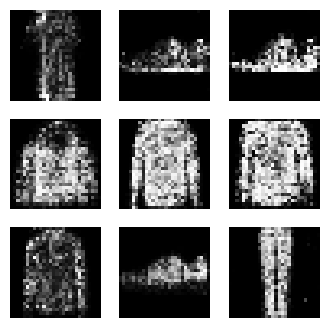

Epoch [2/50], Generator Loss: 0.8074, Discriminator Loss: 1.3661
Epoch [3/50], Generator Loss: 0.8160, Discriminator Loss: 1.3723
Epoch [4/50], Generator Loss: 0.8296, Discriminator Loss: 1.3747
Epoch [5/50], Generator Loss: 0.8159, Discriminator Loss: 1.3728
Epoch [6/50], Generator Loss: 0.8211, Discriminator Loss: 1.3670


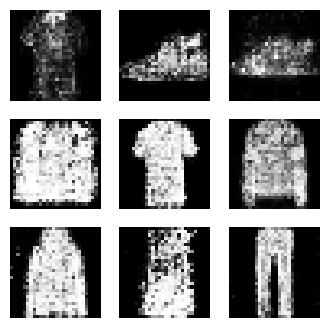

Epoch [7/50], Generator Loss: 0.8139, Discriminator Loss: 1.3706
Epoch [8/50], Generator Loss: 0.8104, Discriminator Loss: 1.3605
Epoch [9/50], Generator Loss: 0.8123, Discriminator Loss: 1.3625
Epoch [10/50], Generator Loss: 0.8135, Discriminator Loss: 1.3698
Epoch [11/50], Generator Loss: 0.8022, Discriminator Loss: 1.3658


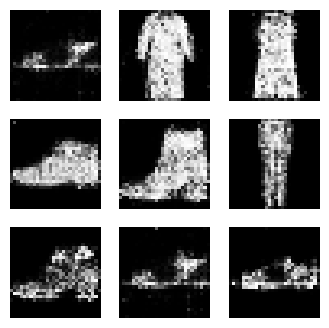

Epoch [12/50], Generator Loss: 0.7953, Discriminator Loss: 1.3716
Epoch [13/50], Generator Loss: 0.7858, Discriminator Loss: 1.3672
Epoch [14/50], Generator Loss: 0.7907, Discriminator Loss: 1.3926
Epoch [15/50], Generator Loss: 0.8101, Discriminator Loss: 1.3731
Epoch [16/50], Generator Loss: 0.8069, Discriminator Loss: 1.3758


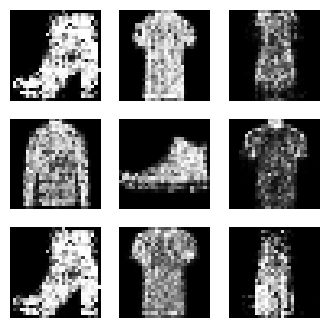

Epoch [17/50], Generator Loss: 0.8067, Discriminator Loss: 1.3728
Epoch [18/50], Generator Loss: 0.7957, Discriminator Loss: 1.3755
Epoch [19/50], Generator Loss: 0.7986, Discriminator Loss: 1.3732
Epoch [20/50], Generator Loss: 0.8088, Discriminator Loss: 1.3742
Epoch [21/50], Generator Loss: 0.8107, Discriminator Loss: 1.3740


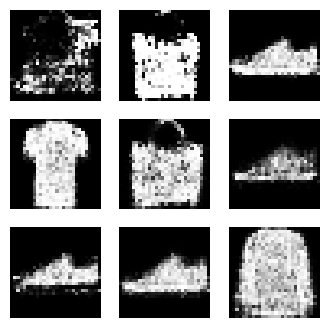

Epoch [22/50], Generator Loss: 0.8004, Discriminator Loss: 1.3662
Epoch [23/50], Generator Loss: 0.7936, Discriminator Loss: 1.3775
Epoch [24/50], Generator Loss: 0.8001, Discriminator Loss: 1.3669
Epoch [25/50], Generator Loss: 0.8164, Discriminator Loss: 1.3616
Epoch [26/50], Generator Loss: 0.8009, Discriminator Loss: 1.3773


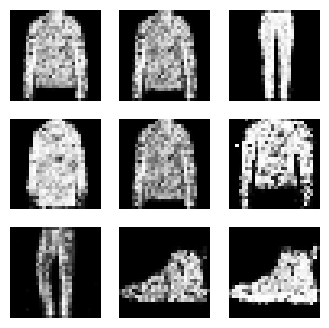

Epoch [27/50], Generator Loss: 0.8018, Discriminator Loss: 1.3707
Epoch [28/50], Generator Loss: 0.7980, Discriminator Loss: 1.3744
Epoch [29/50], Generator Loss: 0.8077, Discriminator Loss: 1.3727
Epoch [30/50], Generator Loss: 0.7996, Discriminator Loss: 1.3739
Epoch [31/50], Generator Loss: 0.8001, Discriminator Loss: 1.3811


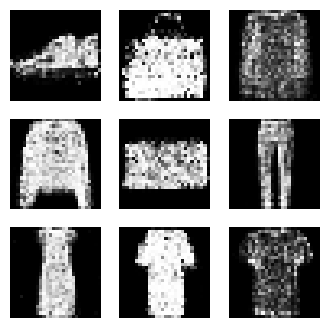

Epoch [32/50], Generator Loss: 0.8005, Discriminator Loss: 1.3752
Epoch [33/50], Generator Loss: 0.8089, Discriminator Loss: 1.3650
Epoch [34/50], Generator Loss: 0.8055, Discriminator Loss: 1.3676
Epoch [35/50], Generator Loss: 0.7982, Discriminator Loss: 1.3764
Epoch [36/50], Generator Loss: 0.8080, Discriminator Loss: 1.3772


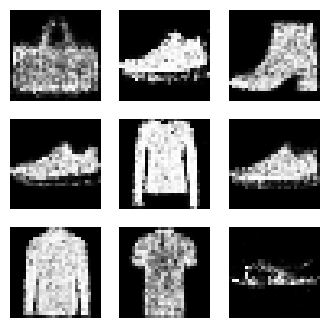

Epoch [37/50], Generator Loss: 0.8011, Discriminator Loss: 1.3793
Epoch [38/50], Generator Loss: 0.8122, Discriminator Loss: 1.3673
Epoch [39/50], Generator Loss: 0.7925, Discriminator Loss: 1.3719
Epoch [40/50], Generator Loss: 0.8033, Discriminator Loss: 1.3704
Epoch [41/50], Generator Loss: 0.7937, Discriminator Loss: 1.3791


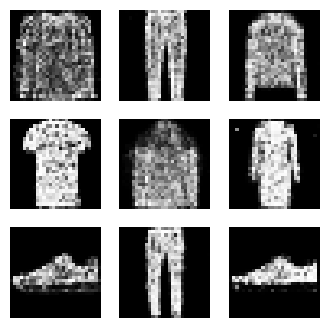

Epoch [42/50], Generator Loss: 0.8057, Discriminator Loss: 1.3686
Epoch [43/50], Generator Loss: 0.7990, Discriminator Loss: 1.3676
Epoch [44/50], Generator Loss: 0.8058, Discriminator Loss: 1.3700
Epoch [45/50], Generator Loss: 0.8096, Discriminator Loss: 1.3751
Epoch [46/50], Generator Loss: 0.7963, Discriminator Loss: 1.3747


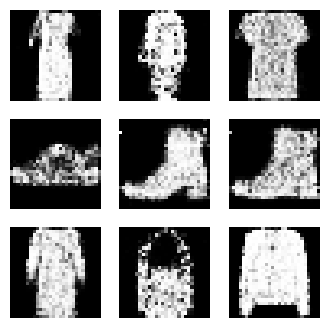

Epoch [47/50], Generator Loss: 0.8024, Discriminator Loss: 1.3737
Epoch [48/50], Generator Loss: 0.7984, Discriminator Loss: 1.3654
Epoch [49/50], Generator Loss: 0.7906, Discriminator Loss: 1.3810
Epoch [50/50], Generator Loss: 0.8188, Discriminator Loss: 1.3645


In [147]:
n_epoch=50
for epoch in range(n_epoch):
    for i, data in enumerate(train_dataloader):
        real_images, _ = data
        real_images= real_images.to(device)
        
        d_optimizer.zero_grad()
        # real_labels=torch.ones(real_images.size(0), 1, device=device)
        real_labels = torch.full((batch_size,1), 0.9, device=device)
        real_outputs=discriminator(real_images)
        real_loss= loss_fn(real_outputs, real_labels)
        # real_loss.backward()
        
        noise= torch.randn(real_images.size(0), noise_dim, device=device)
        fake_images=generator(noise)
        # fake_labels=torch.zeros(real_images.size(0), 1, device=device)
        fake_labels = torch.zeros(batch_size,1, device=device)
        fake_outputs=discriminator(fake_images.detach())
        fake_loss= loss_fn(fake_outputs, fake_labels)
        dis_loss= real_loss + fake_loss
        # fake_loss.backward()
        dis_loss.backward()
        d_optimizer.step()
        
        g_optimizer.zero_grad()
        fake_labels= torch.ones(real_images.size(0), 1, device=device)
        fake_outputs= discriminator(fake_images)
        gen_loss= loss_fn(fake_outputs, fake_labels)
        gen_loss.backward()
        g_optimizer.step()
    print(f"Epoch [{epoch+1}/{n_epoch}], Generator Loss: {gen_loss.item():.4f}, Discriminator Loss: {dis_loss.item():.4f}")
    if epoch%5==0:
        test_noise = torch.randn(9, noise_dim, device=device)
        generate_and_plot_images(generator, epoch, test_noise)